This notebook contains code to plot the median s inferred for each motif/optimal allele

In [1]:
%pylab inline
import glob
import os
import numpy as np
import sys
import seaborn as sns
sys.path.append("/storage/BonnieH/selection_project/helper_functions")
from Joint_method_functions import *
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
PLOTDIR = 'pdfs-round1'
RESFOLDER = '/gymreklab-tscc/bonnieh/joint_method/'
SUPP_PREFIX = "SuppFig11-"

Populating the interactive namespace from numpy and matplotlib


In [2]:
# For each period, for each motif plot opt allele vs. median s

def main():
    print('Running main')
    folder = 'motif_analysis_diff_mu_071921'

    pers = [2,3,4]
    color_list = ['red','orange','lawngreen','forestgreen','turquoise','blue','purple','brown','slategray','yellow','gold']

    motif_dic = {}
    motif_dic[2] = ['AC','AG','AT']
    motif_dic[3] = ['ACC','AGG','AGC','CCG','AAG','AAC','ATC','AAT']
    motif_dic[4] = ['AAGG','AAAT','ATCC','AATC','AAAC','AATG','ACAT','AGAT','AAAG']

    opt_dic = {}
    opt_dic[2] = range(11,21,1) 
    opt_dic[3] = range(5,14,1)
    opt_dic[4] = range(7,11,1)

    color_dic_motif={}
    
    for per in pers:
        i = -1
        for motif in motif_dic[per]:
            i = i + 1
            color_dic_motif[motif] = color_list[i]

    for per in pers:
        opt_alleles = opt_dic[per]
        motifs = motif_dic[per]
        s_motif_opt = {}
        for m in motifs: s_motif_opt[m] = []
        index = -1
        for opt in opt_alleles:
            opt_string = str(opt)
            if opt < 10:
                opt_string = '0' + opt_string
                
            file_list = glob.glob('%s/results_top_x/%s/per_%d*_opt_%s.txt'%(RESFOLDER, folder, per, opt_string))
            file_list.sort() 
            base_plot = ''
            cum_dic = {}
            cum_dic_per_locus = {}

            for filename in file_list:
                results_file = open(filename, 'r')
                lines = results_file.readlines()
                line = lines[4]
                info = line.strip().split(': ')
                num_acc = int(info[1])
                line = lines[1]
                info = line.strip().split(': ')
                num_loci = info[1]
                num_loci = num_loci.strip().split(' ')
                num_loci = int(num_loci[0])

                line = lines[2]
                info = line.strip().split(': ')
                motif = info[2]
                motif = motif.strip().split(' ')
                motif = motif[0]
                opt_allele = int(info[3])

                if num_acc > 0 and num_loci >= 10:

                    if motif != '1.0' and motif != '0.0':
                        line = lines[6]
                        info = line.strip().split(',')
                        k = float(info[0])
                        theta = float(info[1])

                        # Get median value
                        if motif in s_motif_opt.keys():
                            s_motif_opt[motif].append(k*theta)
                else: 
                    if motif in s_motif_opt.keys(): s_motif_opt[motif].append(float("nan"))
        fig = plt.figure()
        ax = fig.add_subplot(111)
        for m in motifs:
            ax.plot(opt_alleles, np.log10(s_motif_opt[m]), color=color_dic_motif[m], label=m, marker="o")
        ax.set_xlabel("Optimal allele")
        ax.set_ylabel("Mean log10 s")
        ax.legend()
        ax.legend(bbox_to_anchor=(1, 1),fontsize=15) 
        fig.savefig(os.path.join(PLOTDIR, SUPP_PREFIX+'meds_opt_per_%d.pdf'%(per)),bbox_inches='tight')
        

Running main


NameError: name 'os' is not defined

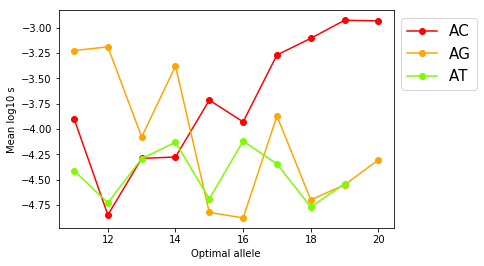

In [3]:
%%time
if __name__ == '__main__':
    main()